<a href="https://colab.research.google.com/github/liza-zy/homeworks-ml-2025/blob/main/HW1_%D0%97%D1%8B%D1%80%D1%8F%D0%BD%D0%BE%D0%B2%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Домашнее задание 1
### Цель задания

Сегодня ваша задача как гейм-аналитика — написать код,  чтобы найти наиболее прибыльные жанры игр и решить, какие 3 игры продаются лучше всех.

### Навыки

|Архитектура|Базы данных|Форматы данных|Инструменты|Коммуникации|ИИ     |
|-----------|-----------|--------------|-----------|------------|-------|
|Отсутствует|нет        |CSV/JSON      |Git        |нет         |ChatGPT|

### Условия

Можно пользоваться любыми языковыми моделями.

###  Формат сдачи и отправка задания

Итоговый блокнот нужно разместить на GitLab либо на GitHub («запушить» в любом формате .py или .ipynb)
и поделиться ссылкой на файл (убедившись в видимости репозитория).

###  Критерии оценивания

| Критерий | Вес | Описание |
|----------|-----|-----------|
| **Основная функциональность** | 2 | Все основные требования задания выполнены корректно (задания 2 и 4) |
| | 1 | Большая часть требований выполнена, но есть незначительные недочеты или пропуски |
|  | 0 | Основные требования не выполнены или выполнены некорректно|
| **Выбор алгоритма** | 1.5 | Выбранные подходы и алгоритмы (например, groupby().sum()) оптимальны и уместны для задачи |
|  | 0.5 | Подходы в целом верны, но могли бы быть более эффективными или уместными |
|  | 0 | Подходы не соответствуют задаче |
| **Точность реализации** | 1.5 | Код реализован корректно, без ошибок, расчеты точны, логика полностью соответствует задаче |
|  | 0.5 | Есть мелкие неточности или логические ошибки, не влияющие критически на результат |
|  | 0 | Содержит существенные ошибки, препятствующие получению верного результата|
| **Обработка краевых случаев** | 1 | Код устойчив к различным входным данным, учтены потенциальные краевые условия |
|  | 0 | Краевые случаи не учтены, возможны ошибки в специфических сценариях |
| **Документация к коду** | 1 | Код прокомментирован, комментарии ясны, помогают понять логику |
|  | 0 | Комментарии отсутствуют или бесполезны |
| **Объяснение результатов** | 1 | Выводы по результатам работы кода четкие, логичные и обоснованные данными |
|  | 0 | Выводы отсутствуют или не имеют отношения к данным |
| **Стиль кода** | 1 | Код читаем, соответствует стандартам PEP-8 |
|  | 0 | Код плохо читаем, стандарты стиля не соблюдены |
| **Анализ ошибок и отладка** | 1 | Способность выявить, понять и исправить ошибку (задание 5) показана полностью и эффективно |
|  | 0 | Ошибка не исправлена или понимание ее причин отсутствует |


**Максимальный балл за выполненную домашнюю работу: 10 баллов**

**Дополнительные условия оценки:**

Можно сдать работу через обычный Google Colab без начисления штрафных баллов и поделиться ссылкой на файл.

**Как будет проверяться:**

Работа будет проверяться преподавателем вручную в течение максимум одной недели.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
file_id = '1y1fqg7yWO6ifgnyJkuZ8IwmMqZjNCUq_'
url = f'https://drive.google.com/uc?export=download&id={file_id}'
videogames_dataset = pd.read_csv(url)
videogames_dataset.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


### **Задание 1**

Поработайте с кодом выше и скачайте датасет. Используя промпт ниже, скормите вашей LLM датасет и получите описание набора данных.
```
опишите набор данных на русском языке @videogames_dataset
```

#### Хорошая новость — вы моментально получите описание набора данных.

Данный набор данных содержит информацию о видеоиграх. Вот описание каждого столбца:

- `Name`: название видеоигры;
- `Platform`: платформа, для которой была выпущена игра (например, Wii, NES);
- `Year_of_Release`: год выпуска игры;
- `Genre`: жанр игры (например, спорт, гонки);
- `Publisher`: издатель игры;
- `NA_Sales`: продажи в Северной Америке (в миллионах единиц);
- `EU_Sales`: продажи в Европе (в миллионах единиц);
- `JP_Sales`: продажи в Японии (в миллионах единиц);
- `Other_Sales`: продажи в других регионах (в миллионах единиц);
- `Global_Sales`: глобальные продажи (в миллионах единиц);
- `Critic_Score`: оценка критиков (максимально 100);
- `Critic_Count`: количество оценок критиков;
- `User_Score`: оценка пользователей (обычно до 10);
- `User_Count`: количество оценок пользователей;
- `Developer`: разработчик игры;
- `Rating`: рейтинг ESRB (возрастная категория игры).

#### Плохая новость — за выполнение задания таким образом вы получите ноль баллов.

 Почему?

 Вы не писали код при выполнении этого задания.

 Мы здесь для того, чтобы научиться писать код при работе с данными.

### **Задание 2**



Сделайте вывод: какие три жанра игр приносят наибольшую выручку?

In [2]:
!pip install pandera
import pandera as pa

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.9/292.9 kB 9.3 MB/s eta 0:00:00


In [3]:
# проверим соответствие типов: жанр это object (может быть и nan), продажи - float
videogames_dataset.dtypes[['Genre', 'Global_Sales']]

,0
Genre,object
Global_Sales,float64


In [4]:
# сначала проверим корректность данных: проверим все возможные значения столбика Genre (чтобы не было опечаток) и проверим на нулевые значения
videogames_dataset['Genre'].unique() # опечаток нет, но есть пустые строки

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [5]:
videogames_dataset[videogames_dataset['Genre'].isna()] # видим, что у этих строк очень малые продажи - не будет большой погрешности, но еще и нет названия
# вдальнейшем эти строки можно удалить - они не информативны.

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
659,NaN,GEN,1993.0,NaN,Acclaim Entertainment,1.78,0.53,0.00,0.08,2.39,NaN,NaN,NaN,NaN,NaN,NaN
14246,NaN,GEN,1993.0,NaN,Acclaim Entertainment,0.00,0.00,0.03,0.00,0.03,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
videogames_dataset[videogames_dataset.duplicated()] # проверим, что нет дубликатов

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating


In [7]:
# проверим, что данные продаж неотрицательны

schema = pa.DataFrameSchema({
    "Global_Sales": pa.Column(
        float,
        checks=pa.Check.ge(0),   # больше либо равно 0
    )
})

/usr/local/lib/python3.12/dist-packages/pandera/_pandas_deprecated.py:149: FutureWarning: Importing pandas-specific classes and functions from the
top-level pandera module will be **removed in a future version of pandera**.
If you're using pandera to validate pandas objects, we highly recommend updating
your import:

```
# old import
import pandera as pa

# new import
import pandera.pandas as pa
```

If you're using pandera to validate objects from other compatible libraries
like pyspark or polars, see the supported libraries section of the documentation
for more information on how to import pandera:

https://pandera.readthedocs.io/en/stable/supported_libraries.html

To disable this warning, set the environment variable:

```
export DISABLE_PANDERA_IMPORT_WARNING=True
```

  warnings.warn(_future_warning, FutureWarning)


In [8]:
schema(videogames_dataset)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Просуммируем мировые продажи по каждому из жанров и выведем в отсортированном виде от наибольшего к наименьшему
top3_genre = videogames_dataset[['Genre', 'Global_Sales']].groupby(by = 'Genre').sum().sort_values(by = 'Global_Sales', ascending=False).head(3)

top3_genre

,Global_Sales
Genre,
Action,1745.27
Sports,1332.00
Shooter,1052.94


Наибольшие продажи у жанров Action, Sports, Shooter

### **Задание 3**

Вы сохраняли результат своей работы локально. Насколько это удобно с точки зрения работы в компании, где в работу вовлечены коллегами?

Сохранение результата работы локально удобно только при индивидуальной работе, либо же при очень редко меняющихся данных. В данном случае приходится вручную обмениваться актуальными изменениями, что требует затрат времени на отправку (особенно, если файлы большие), вызывает проблемы с определением и поиском актуальной версии, а также может вызывать конфликты версий, если их создание происходило синхронно.

### **Задание 4**

Подтвердите или опровергните вывод о том, что первые три строчки в глобальных продажах Nintendo занимают игры:

- Wii Sports;
- Super Mario Bros;
- Mario Kart Wii.

In [10]:
# Выведем только имена и мировые продажи игр, выпущенных Nintendo, отсортируем по уменьшению числа продаж
top_3 = videogames_dataset.loc[videogames_dataset['Publisher'] == 'Nintendo'][['Name', 'Global_Sales']].sort_values(by = 'Global_Sales', ascending=False).head(3)

top_3

,Name,Global_Sales
0,Wii Sports,82.53
1,Super Mario Bros.,40.24
2,Mario Kart Wii,35.52


Первые 3 строчки в числе продаж действительно занимают
- Wii Sports;
- Super Mario Bros;
- Mario Kart Wii.

Проверим это статистически: поскольку размер выборки из топ-3 игр слишком мал для предположений о нормальности распределения в этой группе, воспользуемся u-криитерием

Пусть гипотеза Н0 -  распределения глобальных продаж топ-3 игр и остальных игр одинаковы.

Н1 - распределения отличаются (медиана у топ-3 выше)

In [11]:
from scipy import stats

other = videogames_dataset.loc[videogames_dataset['Publisher'] == 'Nintendo'][['Name', 'Global_Sales']].sort_values(by = 'Global_Sales', ascending=False)[3:]

u_stat, p_val_u = stats.mannwhitneyu(top_3['Global_Sales'], other['Global_Sales'], alternative="greater")
print("U-test: U=%.3f, p=%.5f" % (u_stat, p_val_u))

U-test: U=2109.000, p=0.00139


Видим, что значение р-value < 0.05 - это значит, что гипотеза Н0 отвергается, и игры Wii Sports, Super Mario Bros и Mario Kart Wii статистически значимо являются наиболее продаваемыми играми Нинтендо.

### **Задание 5**

При написании кода разработчики и дата-сайентисты допускают ошибки. Это нормально — ошибки неизбежно возникают при создании программного обеспечения. По разным данным, на устранение багов тратится до 25% времени. Допустим, что при выполнении задания №4 вы допустили досадную оплошность и при создании датафрейма указали несуществующий метод **from_dictionary** вместо правильного метода **from_dict**.

1. Скопируйте код ниже.

2. Создайте ячейку с кодом (нажав на кнопку Python внизу).

3. Если вы работаете через marimo notebook, то вставьте код в созданную ячейку и получите ошибку *AttributeError: type object 'DataFrame' has no attribute 'from_dictionary'*
Если вы используете другую среду, обратитесь к LLM напрямую.

4. Если вы работаете через marimo notebook, то исправьте ошибку, нажав на кнопку Fix with AI и затем нажмите Enter в открывшейся ячейке. После завершения генерации нажми Accept справа, чтобы вставить исправленный результат в блокнот.
Если вы используете другую среду, обратитесь к LLM напрямую.


```python
df = pd.DataFrame.from_dictionary([  {"Name":"Wii Sports","Global_Sales":82.53},
                                     {"Name":"Super Mario Bros.","Global_Sales":40.24},
                                     {"Name":"Mario Kart Wii","Global_Sales":35.52}],
                                     orient='columns')
df
```

In [12]:
df = pd.DataFrame.from_dictionary([  {"Name":"Wii Sports","Global_Sales":82.53},
                                     {"Name":"Super Mario Bros.","Global_Sales":40.24},
                                     {"Name":"Mario Kart Wii","Global_Sales":35.52}],
                                     orient='columns')
df

AttributeError: type object 'DataFrame' has no attribute 'from_dictionary'

In [13]:
# код, предложенный для исправления gemini
df = pd.DataFrame.from_dict([  {"Name":"Wii Sports","Global_Sales":82.53},
                                     {"Name":"Super Mario Bros.","Global_Sales":40.24},
                                     {"Name":"Mario Kart Wii","Global_Sales":35.52}],
                                     orient='columns')
df

,Name,Global_Sales
0,Wii Sports,82.53
1,Super Mario Bros.,40.24
2,Mario Kart Wii,35.52


### **Задание на дополнительный балл**

Скопируйте код ниже, создайте ячейку с кодом (нажав на кнопку Python внизу) и вставьте код в созданную ячейку.

Постройте график зависимости потребности в труде L (по оси Y) от доли задач, подлежащих полной автоматизации $Φ(i)$ (по оси Х) ,
используя формулу $Φ = K/L   / (1 + K/L)$, где L — количество единиц рабочей силы, $K$ — количество единиц капитала, $Φ(i)$ — функция распределения.

```python
df = pd.DataFrame.from_dictionary([ {"K":[0.00,0.25,0.50,0.75,1.00]},
                                    {"L":[1.00,0.75,0.50,0.25,0.00]},
                                    {"phi":[0.00,0.25,0.50,0.75,"∞" ]}],
                                     orient='columns')
df
```

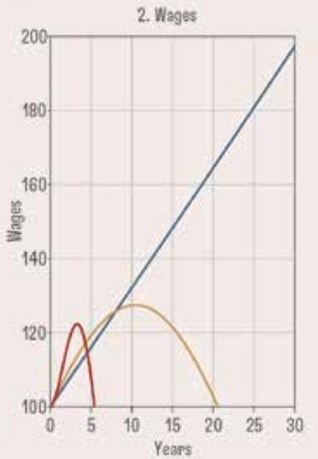

In [14]:
df = pd.DataFrame.from_dict({'K':[0.00,0.25,0.50,0.75,1.00],
                                    'L':[1.00,0.75,0.50,0.25,0.00],
                                    'phi':[0.00,0.25,0.50,0.75,float('inf')]},
                                     orient='columns')
df

,K,L,phi
0,0.00,1.00,0.00
1,0.25,0.75,0.25
2,0.50,0.50,0.50
3,0.75,0.25,0.75
4,1.00,0.00,inf


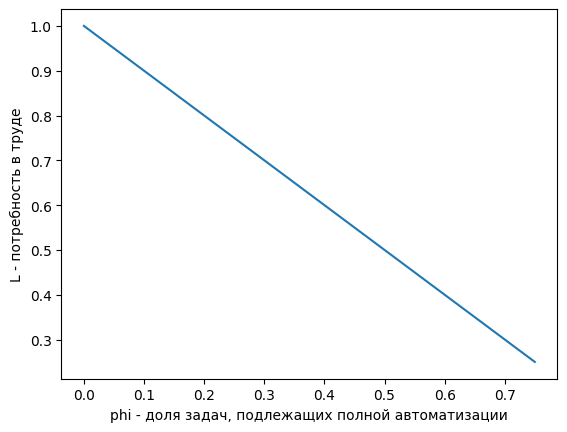

In [15]:
plt.plot(df['phi'], df['L'])
plt.ylabel('L - потребность в труде')
plt.xlabel('phi - доля задач, подлежащих полной автоматизации')
plt.show()

Проведите сравнение заработных плат при разных сценариях полной автоматизации. Для выполнения задания изучите источник: https://www.nber.org/system/files/working_papers/w32255/w32255.pdf

Авторы статьи рассматривают несколько основных сценариев автоматизации, которые глобально можно разделить на 2 типа в зависимости от распределения сложности задач: при **неограниченном распределении сложности задач** полная автоматизация не будет достигнута никогда и зарплаты продолжат расти, а в случае **ограниченного** распределения зарплаты будут уменьшатся до полной автоматизации области. Во втором случае рассматривают также несколько сценариев в зависимости от агрессивности темпов автоматизации: если автоматизация идёт постепенно (базовый сценарий), то сначала наблюдается небольшой рост заработков, но уже до наступления полной автоматизации зарплаты начинают снижаться и в конечном счёте коллапсируют. При более агрессивных темпах (например, при достижении AGI всего за пять лет) рост зарплат прекращается практически сразу, а падение происходит быстрее и резче, хотя сама экономика выходит на взрывные темпы роста. Особняком стоит сценарий «bout of automation»: там автоматизация сначала резко выталкивает зарплаты вниз, но затем, по мере накопления капитала и восстановления относительной редкости труда, они постепенно начинают расти снова и в долгосрочной перспективе могут следовать за динамикой выпуска.